<h1 style="text-align:center"> Exploring and Predicting Characteristics of Japanese Newspaper Headlines </h1> 
<h2 style="text-align:center"> <i>STA208 Final Project (Spring 2017)</i> </h2> 
<h3 style="text-align:center"> <i>Tzu-ping Liu and Gento Kato</i> </h3> 


[<h5 style="text-align:center"> Back to Summary Notebook </h5>](STA208_Project_Summary.ipynb)

<h1 style="text-align:center"> Section IV </h1>
<h1 style="text-align:center"> <i>Exploring Categories of Newspaper Headlines</i> </h1>

In [75]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In this section, we use unsupervised learning methods to explore major categories in both newspaper headlines and words/terms used in headlines. Using word-matrix data imported in subsection 1, we conduct following analyses. First, in subsection 2, we use **k-means** to explore major clusters in **newspaper headlines**. The result implies that k-means is effective in extracting *major topics* in the newspaper headlines. Second, in subsection 3, we use **hierarchical clustering** to identify major clusters of **words/terms**. The result implies that it is difficult to extract intuitive words/terms clusters from hierarchical clustering. Lastly, we end this section by saving data and making concluding comments.  

## 1. Preparation

**Import Packages and Original Data**

To start with, we import python modules that are necessary for the analysis. We use <code>numpy</code>, <code>pandas</code>, and <code>scipy</code> for the data manipulation, <code>sklearn</code> for  methods, and <code>matplotlib</code> for result visualization. 

In [1]:
# Computation Timer
from timeit import default_timer as trec

# Data Mining
import pandas as pd
import numpy as np
from sklearn import decomposition
from scipy.spatial.distance import cdist, pdist
from scipy import sparse as sp ## Sparse Matrix
from sklearn.cluster import KMeans 

# Visualization
from IPython.display import display # Display HTML Table
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The data in use is <code>allWrdMat10.csv.gz</code>, stored in <code>data</code> folder. Check [Section II](STA208_Data_Description.ipynb) for more data details. The shape of the data and computation time for the import is shown as follows:

In [2]:
start = trec()

## Import Data
allWrdMat10 = pd.read_csv("../..//data/allWrdMat10.csv.gz", encoding='CP932')
print('The shape of matrix is: %i rows (headlines) and %i columns (words)' % (allWrdMat10.shape[0],allWrdMat10.shape[1]) )

time = trec() - start
print('Computation time is %0.3f seconds' % time)

The shape of matrix is: 99151 rows (headlines) and 8655 columns (words)
Computation time is 271.994 seconds


## 2. Explore Clusters in Headlines (K-Means)

In this subsection, we apply **k-means** to explore clusters in **newspaper headlines**. First, we apply the method to *full dataset*, while we fail to get the intuitive result. In the second part, we apply the method to the dataset with *reduced words/terms*. From the result of the second analysis, we are able to make substantive interpretations to each clusterar, are able to identify **topical categories** of newspaper headlines. 

### 2.1 Application to Full Dataset

**Create Sparse Matrix**

Given the nature of dataset with many zeros. We convert the original data to CSR sparse matrix to conduct k-means more efficiently. The computation time for the conversion is shown as follows: 

In [3]:
start = trec() 

## Set X as CSR Sparse Matrix (Row Extraction is Faster) 
X = np.array(allWrdMat10)
X = sp.csr_matrix(X)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 28.486 seconds


**Conduct K-Means**

K-means is applied to the full dataset as follows:

In [4]:
start = trec() 

## K Means from Whole Data
## Using the elbow nethod to determine the number of clusters
cluster = range(1, 16)
score = []
for a in cluster:
    kmeans = KMeans(n_clusters=a, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
    ks = -(kmeans.fit(X).score(X))
    score.append(ks)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 6082.276 seconds


Since we intentionally to let the machine decide how many clusters, we utilize the scree plot, which is constructed based on the score and the number of clusters, to see the poential number of clusters we should consider.

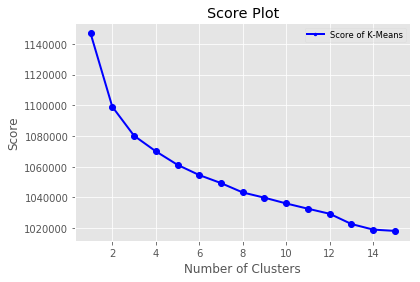

In [5]:
## Plotting the result
plt.plot(cluster, score, 'bo-', linewidth=2)
plt.title('Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
leg = plt.legend(['Score of K-Means'], loc='best', borderpad=0.3,
                 shadow=False, prop=mpl.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

According to the scree plot, it shows that the "**elbow**" point is **3**. However, to prevent the biasness, in addtition to **three** clusters, we also let the machine learn the cases of **four** clusters and **five** clusters. The results are shown below.

*3 clusters*

In [4]:
start = trec() 

kmeans3 = KMeans(n_clusters=3, random_state=0, n_jobs=-1, n_init=10, max_iter=250) # define method
kmresult3 = kmeans3.fit(X) # fit method
kmlabels3 = kmresult3.predict(X) # predicted labels
words = allWrdMat10.columns  # list of words

order_centroids3 = kmresult3.cluster_centers_.argsort()[:, ::-1] # descending order of component
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 318.956 seconds


In [5]:
clustersize = []
for i in range(len(np.unique(kmlabels3))):
    clustersize.append(len(kmlabels3[np.array(kmlabels3) == i]))
pd.DataFrame(index = range(len(np.unique(kmlabels3))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2
Cluster Size,6883,75919,16349


In [6]:
print("Top 20 terms per cluster:")
for a in range(3):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids3[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult3.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)

Top 20 terms per cluster:
Cluster 0:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,％,年度,兆,社
20 highest component,2.549,0.649,0.545,0.432,0.298,0.289,0.278,0.272,0.244,0.217,0.212,0.183,0.165,0.154,0.148,0.088,0.076,0.075,0.061,0.059


Cluster 1:


,米,首相,氏,２,３,日,５,４,政府,人,日本,自民,６,大統領,０,化,案,方針,選,会談
20 highest component,0.103,0.083,0.083,0.082,0.077,0.074,0.055,0.055,0.052,0.047,0.042,0.041,0.041,0.041,0.04,0.039,0.038,0.036,0.036,0.035


Cluster 2:


,１,２,５,３,０,円,４,人,日,％,６,９,年,７,８,．,億,万,調査,連載
20 highest component,1.035,0.412,0.291,0.288,0.28,0.242,0.232,0.21,0.201,0.19,0.183,0.177,0.175,0.167,0.153,0.094,0.093,0.085,0.084,0.07


*4 clusters*

In [7]:
start = trec() 

kmeans4 = KMeans(n_clusters=4, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult4 = kmeans4.fit(X)
kmlabels4 = kmresult4.predict(X)
words = allWrdMat10.columns

order_centroids4 = kmresult4.cluster_centers_.argsort()[:, ::-1]
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 479.688 seconds


In [8]:
clustersize = []
for i in range(len(np.unique(kmlabels4))):
    clustersize.append(len(kmlabels4[np.array(kmlabels4) == i]))
pd.DataFrame(index = range(len(np.unique(kmlabels4))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3
Cluster Size,70270,11327,10706,6848


In [9]:
print("Top 20 terms per cluster:")

for a in range(4):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids4[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult4.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)

Top 20 terms per cluster:
Cluster 0:


,米,首相,氏,３,日,５,４,政府,大統領,自民,日本,人,６,化,案,方針,会談,選,０,者
20 highest component,0.106,0.085,0.085,0.077,0.063,0.055,0.054,0.053,0.042,0.042,0.041,0.041,0.04,0.039,0.038,0.037,0.036,0.036,0.036,0.035


Cluster 1:


,１,円,０,３,５,日,４,人,９,年,６,７,８,２,％,億,万,連載,米,．
20 highest component,1.275,0.274,0.259,0.244,0.231,0.204,0.19,0.181,0.161,0.155,0.155,0.144,0.135,0.115,0.108,0.094,0.078,0.078,0.07,0.06


Cluster 2:


,２,１,５,３,０,日,％,人,４,年,６,７,９,８,調査,円,．,連載,米,万
20 highest component,1.098,0.241,0.231,0.218,0.21,0.205,0.198,0.191,0.189,0.155,0.143,0.129,0.128,0.11,0.089,0.085,0.085,0.071,0.069,0.06


Cluster 3:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,年度,％,兆,社
20 highest component,2.55,0.64,0.536,0.435,0.3,0.291,0.278,0.274,0.247,0.218,0.211,0.184,0.167,0.155,0.148,0.087,0.075,0.075,0.062,0.059


*5 clusters*

In [10]:
start = trec() 

kmeans5 = KMeans(n_clusters=5, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult5 = kmeans5.fit(X)
kmlabels5 = kmresult5.predict(X)
words = allWrdMat10.columns

order_centroids5 = kmresult5.cluster_centers_.argsort()[:, ::-1]
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 516.373 seconds


In [11]:
clustersize = []
for i in range(len(np.unique(kmlabels5))):
    clustersize.append(len(kmlabels5[np.array(kmlabels5) == i]))
pd.DataFrame(index = range(len(np.unique(kmlabels5))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3,4
Cluster Size,63561,11010,10256,6842,7482


In [12]:
print("Top 20 terms per cluster:")
for a in range(5):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids5[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult5.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)

Top 20 terms per cluster:
Cluster 0:


,氏,首相,３,５,４,政府,自民,人,日,６,化,案,日本,方針,選,調査,０,者,東京,きょう
20 highest component,0.09,0.087,0.08,0.057,0.056,0.052,0.046,0.043,0.043,0.041,0.04,0.039,0.039,0.039,0.038,0.037,0.037,0.036,0.036,0.035


Cluster 1:


,１,円,０,３,５,４,日,人,９,６,年,７,８,２,％,億,万,連載,．,調査
20 highest component,1.282,0.28,0.262,0.248,0.236,0.194,0.194,0.185,0.164,0.158,0.156,0.147,0.138,0.118,0.111,0.097,0.08,0.078,0.062,0.058


Cluster 2:


,２,１,５,３,０,人,％,日,４,年,６,９,７,８,調査,円,．,連載,万,億
20 highest component,1.112,0.247,0.231,0.217,0.212,0.196,0.195,0.192,0.189,0.153,0.144,0.128,0.128,0.108,0.09,0.088,0.083,0.071,0.061,0.048


Cluster 3:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,％,年度,兆,社
20 highest component,2.551,0.64,0.536,0.435,0.3,0.291,0.278,0.274,0.247,0.218,0.211,0.184,0.166,0.155,0.147,0.087,0.075,0.075,0.062,0.059


Cluster 4:


,米,日,大統領,会談,軍,協議,首脳,イラク,日本,首相,合意,北朝鮮,対,３,核,長官,政府,５,中,ブッシュ
20 highest component,1.106,0.285,0.153,0.134,0.113,0.1,0.092,0.084,0.067,0.067,0.066,0.065,0.064,0.063,0.062,0.06,0.055,0.052,0.051,0.05


By the results, overall, we cannot find clusters with intuitive interpretations. On the other hand, we find that most influential words/terms are *numbers*, *units*, and several *neutral political terms*, which tend to **appear very frequently** across different types of headlines. The most important contribution of this initial analysis is that, we may need to **delete** some words/terms for **k-means** to generate more intuitive categories. In particular, the result implies that deletion of the words/terms that are **too common** or **too rare** may be important. Therefore, in the next subsection, we reduce words/terms by frequency criteria, and further train the machine and further see what clusters we will get. 
<!--
Also, note that none of the results show that unsupervised learning divides headlines into **positive** and **negative** news. The results of **k-means** are still very heuritic for the future study. 
--->

### 2.2 Application to Dataset with Reduced Words

Here, we apply k-means to the new reduced word-matrix dataset. In the reduced dataset, we eliminate those words/terms that are **too common (appear $\geq 5000$ times in data), or too rare (appear $\leq 50$ times in data)**.

**allWrdMat Reduced Words Data**

Following the frequency criteria, we create a new word-matrix data by eliminating those words with more thann 5000 and less than 50 in total frequency of word appearance. The new data structure is presented as follows:

In [14]:
## Set conditions
minfreq = 50; maxfreq = 5000 # set minimum frequency and maximum frequency

#Export reduced data
start = trec()
allWrdMat10_freq = pd.DataFrame(allWrdMat10.sum(), columns=['Total Freq.']) ## Calculate Total Frequency
condition = (allWrdMat10_freq.iloc[:,0] >= minfreq) & (allWrdMat10_freq.iloc[:,0] <= maxfreq) #Import Condition
allWrdMat10_reduced = allWrdMat10.loc[:,condition] # Reduced Data
print('The shape of new matrix is: %i rows (headlines) and %i columns (words)' % (allWrdMat10_reduced.shape[0],allWrdMat10_reduced.shape[1]) )
print('Eliminated high frequency words are:')
display(allWrdMat10_freq.loc[allWrdMat10_freq.iloc[:,0] >= maxfreq,:].transpose()) #  Omitted High Frequency Variables
time = trec() - start
print('Computation time is %0.3f seconds' % time)

The shape of new matrix is: 99151 rows (headlines) and 3158 columns (words)
Eliminated high frequency words are:


,％,０,１,２,３,４,５,６,７,８,９,円,氏,首相,人,日,年,米
Total Freq.,5062,25161,21400,16721,12539,9448,10997,7383,6119,6071,6427,8371,6901,6950,8892,9552,6863,9308


Computation time is 7.577 seconds


From the above table, all numbers and some units (e.g., "%", "円 (yen)", "年 (year)") and neutral political terms (e.g., "首相 (prime minster)", "米 (abbreviation for 米国 United States)" ) are eliminated from the new dataset as too common words.

**Sparse Matrix of Reduced Data**

As in the previous part, the sparse matrix is created. The computation time for the conversion is shown as follows:

In [15]:
start = trec() 

## Set X as CSR Sparse Matrix (Row Extraction is Faster) 
X_reduced = np.array(allWrdMat10_reduced)
X_reduced = sp.csr_matrix(X_reduced)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 9.827 seconds


**K-Means on Reduced Data**

K-means is applied to the full dataset as follows:

In [16]:
start = trec() 

## Using the elbow nethod to determine the number of clusters
cluster = range(1, 16)
score_r = []
for a in cluster:
    kmeans = KMeans(n_clusters=a, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
    ks = -(kmeans.fit(X_reduced).score(X_reduced))
    score_r.append(ks)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 2689.765 seconds


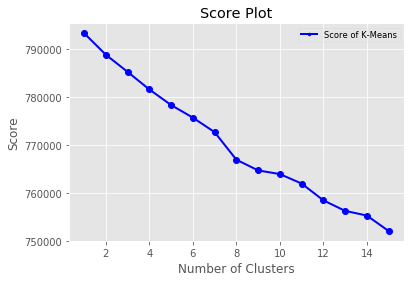

In [17]:
## Plotting the result
plt.plot(cluster, score_r, 'bo-', linewidth=2)
plt.title('Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
leg = plt.legend(['Score of K-Means'], loc='best', borderpad=0.3,
                 shadow=False, prop=mpl.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

According to the scree plot, it shows that by the reduced data, the "**elbow**" point is **8**. 
However, to prevent the biasness, in addtition to **right** clusters, 
we also let the machine learn the cases of **seven** clusters and **nine** clusters. The results are shown below.

*7 clusters*

In [16]:
start = trec() 

kmeans7r = KMeans(n_clusters=7, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult7r = kmeans7r.fit(X_reduced)
kmlabels7r = kmresult7r.predict(X_reduced)
words = allWrdMat10_reduced.columns
order_centroids7r = kmresult7r.cluster_centers_.argsort()[:, ::-1]
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 300.177 seconds


In [17]:
kmcluster7 = kmlabels7r; clustersize = []
for i in range(len(np.unique(kmcluster7))):
    clustersize.append(len(kmcluster7[np.array(kmcluster7) == i]))
pd.DataFrame(index = range(len(np.unique(kmcluster7))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3,4,5,6
Cluster Size,3452,79258,3595,3255,1871,4480,3240


In [18]:
print("Top 20 terms per cluster: \n")

for a in range(7):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids7r[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult7r.cluster_centers_[a,b])
    comptable7 = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))

    comptable7 = comptable7.transpose()
    display(comptable7)

Top 20 terms per cluster: 

Cluster 0:


,億,ドル,兆,万,年度,予算,支援,赤字,政府,社,金,分,増,費,融資,．,資金,総額,方針,数
20 highest component,1.069,0.138,0.133,0.093,0.08,0.074,0.071,0.07,0.061,0.059,0.053,0.052,0.052,0.052,0.048,0.046,0.046,0.042,0.04,0.039


Cluster 1:


,政府,調査,日本,案,万,方針,化,自民,会談,大統領,きょう,者,する,合意,協議,検討,改革,会議,中国,委
20 highest component,0.053,0.048,0.041,0.041,0.04,0.039,0.038,0.035,0.034,0.033,0.032,0.032,0.029,0.028,0.028,0.027,0.027,0.026,0.026,0.025


Cluster 2:


,イラク,軍,大統領,政府,国連,攻撃,派遣,クウェート,対,撤退,支援,国籍,自衛隊,沖縄,会談,死亡,湾岸,戦争,ソ連,基地
20 highest component,0.591,0.527,0.109,0.085,0.082,0.063,0.057,0.056,0.055,0.053,0.053,0.052,0.05,0.048,0.045,0.045,0.045,0.044,0.043,0.037


Cluster 3:


,選,自民,参院,衆院,投票,総裁,知事,民主,党,市長,調査,出馬,きょう,大統領,代表,表明,選挙,統一,県,告示
20 highest component,1.059,0.243,0.219,0.175,0.14,0.139,0.133,0.125,0.112,0.101,0.089,0.087,0.078,0.077,0.065,0.058,0.054,0.052,0.049,0.048


Cluster 4:


,容疑,逮捕,者,事件,ら,万,地検,警視庁,殺人,社長,東京,きょう,殺害,県警,収賄,詐欺,捜査,議員,供述,歳
20 highest component,0.742,0.657,0.27,0.19,0.162,0.094,0.084,0.076,0.076,0.071,0.068,0.065,0.065,0.064,0.061,0.061,0.057,0.055,0.052,0.048


Cluster 5:


,連載,地球,寄稿,読む,部,日本,上,世界,中,下,化,経済,危機,政治,する,改革,中国,時代,環境,社会
20 highest component,0.81,0.224,0.194,0.19,0.167,0.117,0.081,0.078,0.076,0.065,0.055,0.055,0.054,0.054,0.051,0.049,0.046,0.04,0.038,0.036


Cluster 6:


,東京,地検,地裁,事件,億,都,ら,万,聴取,捜査,台,起訴,容疑,終値,銭,区,きょう,市場,会議,五輪
20 highest component,1.015,0.189,0.074,0.067,0.065,0.065,0.054,0.054,0.052,0.047,0.043,0.042,0.042,0.039,0.037,0.036,0.035,0.033,0.033,0.033


From the above result, now it is possible for us to make substantive interpretation of each cluster. In the following, we name clusters based on top 20 words in each cluster.

* Cluster 0: **Budget** ("億" billion, "年度" fiscal year, "予算" budget, "赤字" deficit, "政府" government, "費" cost, ...)
* Cluster 1: **General** (Remaining Category)
* Cluster 2: **War** ("イラク" Iraq, "軍" army, "国連" United Nations, "攻撃" attack, "クウェート" Kuwait, "撤退" retreat, "自衛隊" Self Defence Force, ...)
* Cluster 3: **Election** ("選" choose. used in the context of election (e.g., 衆院選 lower house election, 知事選 gubernatorial election, 総裁選 party leader election), "自民" Liberal Democratic Party, "投票" vote, "民主" Democratic Party, "市長" mayor, "出馬" run in election, "県" prefecture, ... )
* Cluster 4: **Social-Crime** ("容疑" criminal charge, "逮捕" arrest, "者" man (e.g., 容疑者 suspect), "事件" affair, "地検" district prosecutor's office, "警視庁" the Metropolitan Police Department, "殺人" murder, "殺害" killing, "県警" prefectural police department, "収賄" accepting bribes, 
"詐欺" deception/fraud, "供述" testimony, ...)
* Cluster 5: **Featured** ("連載" running story, "地球" "読む" (there is a famous feature story in Yomiuri called "地球を読む" Read the Globe), "寄稿" contributed article, "部" part (e.g., 第一部 part 1), "上" upper "中" middle "下" lower (imply part 1, 2, 3), "日本" Japan, "世界" world, ...)
* Cluster 6: **Crime-Economy** ("地検" district prosecutor's office, "地裁" district court, "億" billion, "万" ten thousand, "聴取" hearing, "捜査" crime investigation, "市場" market, ...)

Cluster labels are saved into new object as follows:

In [25]:
## Save Cluster Labels

start = trec() 

saveres = kmlabels7r
nameres = np.repeat("xxxxxxxxxxxxxx",len(saveres))

nameres[np.array(saveres)==0] = "Budget"
nameres[np.array(saveres)==1] = "General"
nameres[np.array(saveres)==2] = "War"
nameres[np.array(saveres)==3] = "Election"
nameres[np.array(saveres)==4] = "Social-Crime"
nameres[np.array(saveres)==5] = "Featured"
nameres[np.array(saveres)==6] = "Crime-Economy"

kmlabels7r_name = nameres

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.008 seconds


*8 clusters*

In [27]:
start = trec() 

kmeans8r = KMeans(n_clusters=8, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult8r = kmeans8r.fit(X_reduced)
kmlabels8r = kmresult8r.predict(X_reduced)
words = allWrdMat10_reduced.columns

order_centroids8r = kmresult8r.cluster_centers_.argsort()[:, ::-1]
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 231.639 seconds


In [28]:
kmcluster8 = kmlabels8r; clustersize = []
for i in range(len(np.unique(kmcluster8))):
    clustersize.append(len(kmcluster8[np.array(kmcluster8) == i]))
pd.DataFrame(index = range(len(np.unique(kmcluster8))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3,4,5,6,7
Cluster Size,3000,74378,2918,3134,3693,3659,3996,4373


In [29]:
print("Top 20 terms per cluster: \n")

for a in range(8):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids8r[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult8r.cluster_centers_[a,b])
    comptable8 = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable8 = comptable8.transpose()
    display(comptable8)

Top 20 terms per cluster: 

Cluster 0:


,大統領,ロシア,ブッシュ,会談,ソ連,エリツィン,イラク,韓国,選,ゴルバチョフ,表明,来日,クリントン,演説,会見,軍,外相,訪日,フセイン,金
20 highest component,1.039,0.142,0.12,0.105,0.105,0.095,0.093,0.086,0.075,0.073,0.072,0.056,0.055,0.05,0.045,0.041,0.04,0.04,0.038,0.037


Cluster 1:


,政府,億,日本,方針,案,東京,化,者,自民,事件,検討,する,改革,法,中国,．,合意,会議,党,委
20 highest component,0.056,0.044,0.042,0.041,0.04,0.04,0.037,0.036,0.033,0.028,0.028,0.028,0.025,0.025,0.024,0.024,0.024,0.023,0.023,0.022


Cluster 2:


,選,自民,参院,衆院,総裁,知事,民主,党,投票,市長,出馬,きょう,代表,表明,調査,選挙,県,統一,告示,候補
20 highest component,1.068,0.263,0.23,0.185,0.155,0.149,0.129,0.12,0.119,0.111,0.094,0.078,0.071,0.062,0.059,0.057,0.054,0.053,0.053,0.047


Cluster 3:


,会談,首脳,外相,合意,中,協議,会議,ソ,韓,北朝鮮,一致,表明,問題,中国,協力,大統領,党首,核,確認,共同
20 highest component,0.788,0.599,0.133,0.119,0.104,0.096,0.088,0.082,0.079,0.074,0.069,0.06,0.057,0.056,0.055,0.053,0.053,0.052,0.051,0.048


Cluster 4:


,万,億,東証,者,台,終値,東京,調査,件,．,容疑,株,千,数,逮捕,銭,省,社,政府,分
20 highest component,1.06,0.1,0.075,0.062,0.06,0.06,0.057,0.053,0.053,0.046,0.046,0.044,0.041,0.04,0.04,0.037,0.035,0.034,0.034,0.034


Cluster 5:


,連載,部,日本,上,中,世界,下,政治,する,経済,危機,化,改革,時代,中国,環境,変わる,社会,再生,地球
20 highest component,1.0,0.204,0.128,0.1,0.087,0.086,0.079,0.06,0.057,0.054,0.054,0.052,0.052,0.046,0.046,0.045,0.043,0.041,0.04,0.04


Cluster 6:


,調査,世論,朝日新聞社,読売新聞社,割,支持,内閣,全国,社,省,率,自民,．,する,会,読売新聞,委,者,本社,日本
20 highest component,1.006,0.311,0.167,0.159,0.15,0.139,0.11,0.102,0.061,0.056,0.05,0.046,0.046,0.042,0.041,0.041,0.041,0.04,0.039,0.038


Cluster 7:


,きょう,問題,協議,案,委,衆院,政府,決定,自民,北朝鮮,予算,会議,東京,ら,開幕,法案,合意,党,核,国会
20 highest component,0.619,0.406,0.071,0.058,0.058,0.056,0.044,0.043,0.043,0.041,0.04,0.038,0.037,0.034,0.034,0.034,0.032,0.031,0.031,0.031


In the following, we name clusters based on top 20 words in each cluster.

* Cluster 0: **Diplomacy 1**: ("大統領" president, "ロシア" Russia, "ブッシュ" Bush, "会談" meeting, "ソ連" Soviet, "エリツィン" Yeltsin, "韓国" South Korea, "来日" visiting Japan, "クリントン" Clinton, "演説" speech, "会見" press conference, ...)
* Cluster 1: **General** (Remaining Category)
* Cluster 2: **Election** ("選" choose. used in the context of election (e.g., 衆院選 lower house election, 知事選 gubernatorial election, 総裁選 party leader election), "自民" Liberal Democratic Party, "投票" vote, "民主" Democratic Party, "市長" mayor, "出馬" run in election, "県" prefecture, ... )
* Cluster 3: **Diplomacy 2**: ("会談" meeting, "首脳" national heads, "外相" foreign minister, "合意" agreement, "協議" negotiation/conference, "一致" agree, "協力" cooperation, ...)
* Cluster 4: **Economy-Crime** ("万" ten thousand, "億" billion, "東証" Tokyo stock market, "終値" end price, "調査" research, "容疑" crime charge, "株" stock, "社" company, ...)
* Cluster 5: **Featured** ("連載" running story, "部" part (e.g., 第一部 part 1), "上" upper "中" middle "下" lower (imply part 1, 2, 3), "日本" Japan, "世界" world, "時代" era, "変わる" change, "社会" society, "再生" regrowth, ...)
* Cluster 6: **Polling** ("調査" research "世論" public opinion (i.e., 世論調査 public opinion poll), "朝日新聞社" Asahi Shimbun Company, "読売新聞社" Yomiuri Shimbun Company, "割" proportion (e.g., 5割 fifty percent), "支持" approval, "内閣" cabinet, "全国" national, "率" rate, "自民" Liberal Democratic Party, ...)
* Cluster 7: **Politics**: ("問題" problem, "案" plan (e.g., 予算案 budget plan), "委" abbreviation for 委員会 committee, "衆院" House of Representatives (lower house), "決定" decision, "会議" conference, "法案" bill, "党" political party, "国会" Diet, ...)

$\star$ **Diplomcay 1** tend to include those topics involving one-to-one meetings of Japanese prime minister and leaders of other countries, esipecially when those foreign leaders visit Japan. **Diplomacy 2** tend to include lower level diplomacy in the context of internation cooperation. 

Cluster labels are saved into new object as follows:

In [30]:
## Save Cluster Labels

start = trec() 

saveres = kmlabels8r
nameres = np.repeat("xxxxxxxxxxxxxx",len(saveres))

nameres[np.array(saveres)==0] = "Diplomacy 1"
nameres[np.array(saveres)==1] = "General"
nameres[np.array(saveres)==2] = "Election"
nameres[np.array(saveres)==3] = "Diplomacy 2"
nameres[np.array(saveres)==4] = "Economy-Crime"
nameres[np.array(saveres)==5] = "Featured"
nameres[np.array(saveres)==6] = "Polling"
nameres[np.array(saveres)==7] = "Politics"

kmlabels8r_name = nameres

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.010 seconds


*9 clusters*

In [31]:
start = trec() 

kmeans9r = KMeans(n_clusters=9, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult9r = kmeans9r.fit(X_reduced)
kmlabels9r = kmresult9r.predict(X_reduced)
words = allWrdMat10_reduced.columns

order_centroids9r = kmresult9r.cluster_centers_.argsort()[:, ::-1]

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 253.083 seconds


In [32]:
kmcluster9 = kmlabels9r; clustersize = []
for i in range(len(np.unique(kmcluster9))):
    clustersize.append(len(kmcluster9[np.array(kmcluster9) == i]))
pd.DataFrame(index = range(len(np.unique(kmcluster9))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3,4,5,6,7,8
Cluster Size,2967,72922,2913,2558,3654,3550,3935,4221,2431


In [33]:
print("Top 20 terms per cluster: \n")

for a in range(9):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids9r[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult9r.cluster_centers_[a,b])
    comptable9 = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable9 = comptable9.transpose()
    display(comptable9)
    
time = trec() - start

Top 20 terms per cluster: 

Cluster 0:


,大統領,ロシア,ブッシュ,ソ連,会談,エリツィン,イラク,韓国,選,ゴルバチョフ,表明,クリントン,来日,演説,会見,軍,訪日,フセイン,外相,金
20 highest component,1.04,0.144,0.121,0.106,0.102,0.095,0.094,0.087,0.076,0.073,0.072,0.056,0.056,0.051,0.045,0.042,0.04,0.038,0.038,0.037


Cluster 1:


,政府,億,日本,案,方針,東京,化,者,自民,検討,事件,会議,改革,法,合意,中国,．,党,ら,委
20 highest component,0.056,0.045,0.042,0.04,0.04,0.04,0.037,0.035,0.033,0.028,0.028,0.026,0.025,0.025,0.024,0.024,0.024,0.023,0.022,0.022


Cluster 2:


,選,自民,参院,衆院,総裁,知事,民主,党,投票,市長,出馬,きょう,代表,表明,調査,選挙,県,告示,統一,候補
20 highest component,1.068,0.263,0.23,0.184,0.155,0.15,0.129,0.12,0.119,0.111,0.094,0.079,0.071,0.062,0.058,0.057,0.055,0.054,0.054,0.047


Cluster 3:


,会談,首脳,外相,合意,中,協議,ソ,韓,北朝鮮,党首,一致,大統領,きょう,表明,問題,中国,核,協力,確認,朝
20 highest component,0.997,0.477,0.164,0.12,0.116,0.109,0.098,0.088,0.08,0.074,0.073,0.07,0.067,0.064,0.062,0.061,0.054,0.052,0.052,0.048


Cluster 4:


,万,億,東証,者,台,終値,東京,調査,件,．,容疑,株,千,数,逮捕,銭,省,社,政府,分
20 highest component,1.061,0.101,0.076,0.062,0.06,0.06,0.057,0.053,0.053,0.046,0.046,0.044,0.042,0.04,0.04,0.038,0.036,0.035,0.034,0.034


Cluster 5:


,連載,部,日本,上,中,世界,下,政治,経済,危機,化,改革,時代,変わる,中国,社会,再生,環境,地球,世紀
20 highest component,1.0,0.21,0.132,0.102,0.09,0.088,0.081,0.059,0.056,0.054,0.052,0.052,0.047,0.045,0.042,0.042,0.041,0.041,0.04,0.034


Cluster 6:


,調査,世論,朝日新聞社,読売新聞社,割,支持,内閣,全国,社,省,率,．,自民,読売新聞,者,会,委,本社,日本,評価
20 highest component,1.006,0.315,0.17,0.161,0.153,0.142,0.111,0.103,0.061,0.056,0.05,0.047,0.047,0.042,0.04,0.04,0.04,0.04,0.038,0.034


Cluster 7:


,きょう,問題,協議,案,委,衆院,政府,決定,北朝鮮,自民,会議,予算,東京,開幕,ら,法案,核,合意,国会,党
20 highest component,0.616,0.41,0.072,0.06,0.059,0.057,0.045,0.043,0.043,0.042,0.04,0.04,0.037,0.035,0.035,0.034,0.033,0.033,0.031,0.031


Cluster 8:


,する,れる,政府,化,連載,者,方針,日本,報告,中国,案,閉幕,会議,改革,北朝鮮,自民,採択,問題,合意,事件
20 highest component,1.018,0.07,0.055,0.049,0.046,0.044,0.04,0.039,0.037,0.036,0.035,0.033,0.032,0.031,0.031,0.031,0.03,0.03,0.028,0.026


In the following, we name clusters based on top 20 words in each cluster.

* Cluster 0: **Diplomacy 1**: ("大統領" president, "ロシア" Russia, "ブッシュ" Bush, "会談" meeting, "ソ連" Soviet, "エリツィン" Yeltsin, "韓国" South Korea, "来日" visiting Japan, "クリントン" Clinton, "演説" speech, "会見" press conference, "外相" foreign minister, ...)
* Cluster 1: **General** (Remaining Category)
* Cluster 2: **Election** ("選" choose. used in the context of election (e.g., 衆院選 lower house election, 知事選 gubernatorial election, 総裁選 party leader election), "自民" Liberal Democratic Party, "投票" vote, "民主" Democratic Party, "市長" mayor, "出馬" run in election, "県" prefecture, ... )
* Cluster 3: **Diplomacy 2**: ("会談" meeting, "首脳" national heads, "外相" foreign minister, "合意" agreement, "協議" negotiation/conference, "一致" agree, "協力" cooperation, ...)
* Cluster 4: **Economy-Crime** ("万" ten thousand, "億" billion, "東証" Tokyo stock market, "終値" end price, "調査" research, "容疑" crime charge, "株" stock, "社" company, ...)
* Cluster 5: **Featured 1** ("連載" running story, "部" part (e.g., 第一部 part 1), "上" upper "中" middle "下" lower (imply part 1, 2, 3), "日本" Japan, "世界" world, "時代" era, "変わる" change, "社会" society, "再生" regrowth, ...)
* Cluster 6: **Polling** ("調査" research "世論" public opinion (i.e., 世論調査 public opinion poll), "朝日新聞社" Asahi Shimbun Company, "読売新聞社" Yomiuri Shimbun Company, "割" proportion (e.g., 5割 fifty percent), "支持" approval, "内閣" cabinet, "全国" national, "率" rate, "自民" Liberal Democratic Party, ...)
* Cluster 7: **Politics**: ("問題" problem, "案" plan (e.g., 予算案 budget plan), "委" abbreviation for 委員会 committee, "衆院" House of Representatives (lower house), "決定" decision, "会議" conference, "法案" bill, "党" political party, "国会" Diet, ...)
* Cluster 8: **Featured 2** ("する" do, "れる" verb used for passive voice, "政府" government, "連載" running story, "報告" report, "閉幕" closing, "改革" reform, "採択" choice (of proposal in conference), ...)

$\star$ **Diplomcay 1** tend to include those topics involving one-to-one meetings of Japanese prime minister and leaders of other countries, esipecially when those foreign leaders visit Japan. **Diplomacy 2** tend to include lower level diplomacy in the context of internation cooperation. **Featured 1** is similar to **Featured** in 8 cluster version. **Featured 2** is an unclear category, but it seems to deal with different feature articles involving domestic politics issues. 

Cluster labels are saved into new object as follows:

In [34]:
## Save Cluster Labels

start = trec() 

saveres = kmlabels9r
nameres = np.repeat("xxxxxxxxxxxxxx",len(saveres))

nameres[np.array(saveres)==0] = "Diplomacy 1"
nameres[np.array(saveres)==1] = "General"
nameres[np.array(saveres)==2] = "Election"
nameres[np.array(saveres)==3] = "Diplomacy 2"
nameres[np.array(saveres)==4] = "Economy-Crime"
nameres[np.array(saveres)==5] = "Featured 1"
nameres[np.array(saveres)==6] = "Polling"
nameres[np.array(saveres)==7] = "Politics"
nameres[np.array(saveres)==8] = "Featured 2"

kmlabels9r_name = nameres

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.009 seconds


## 3. Explore Words/Terms Clusters (Hierarchical Clustering)

In this subsection, we apply **hierarchical clustering** to explore clusters in **words/terms** appeared in headlines. The data in use is a **transposed word-matrix** data.F irst, we apply the method to *first 1000 words* in the dataset, to experiment on the method. Then, we apply the method to *full dataset*, while we fail to get the intuitive result. In the second part, we apply the method to the dataset with *reduced words/terms*. We discuss briefly on the results from the last analysis.

### 3.1 Prepare Functions and Data

We use <code>AgglomerativeClustering</code> method in <code>scikit-learn</code> module to conduct hierarchical clustering. Dendrogram is drawn by <code>scipy.cluster.hierarchy</code>. 

In [35]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
from matplotlib.font_manager import FontProperties
from sklearn.cluster import AgglomerativeClustering as hicluster

%matplotlib inline

In [36]:
## Words Index
dict_index = {t:i for i,t in enumerate(allWrdMat10.columns)}

dictlist = []
temp = []
akey = []
avalue = []

for key, value in dict_index.items():
    akey.append(key)
    avalue.append(value)
    temp = [key,value]
    dictlist.append(temp)

### 3.2 Application to First 1000 words 

First, we experiment hierarchical clustering on first 1000 words in the dataset to see if it can be executed without errors. Three linkages are tested: ward, complete and average. The analysis coding and computation time is shown as follows:

In [31]:
## Prepare Transposed Data
avalue = np.array(avalue)

X_transform = X[:, avalue < 1000].transpose().toarray()

freq1000terms = akey
freq1000terms = np.array(freq1000terms)[avalue < 1000]

In [32]:
start = trec() 
hicl_ward = hicluster(n_clusters=40,linkage='ward', compute_full_tree = False)
hicl_comp = hicluster(n_clusters=40,linkage='complete', compute_full_tree = False)
hicl_avg = hicluster(n_clusters=40,linkage='average', compute_full_tree = False)

hiclwres = hicl_ward.fit(X_transform)
hiclcres = hicl_comp.fit(X_transform)
hiclares = hicl_avg.fit(X_transform)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 167.839 seconds


Dendrogram from each linkage method can be drawn as follows:

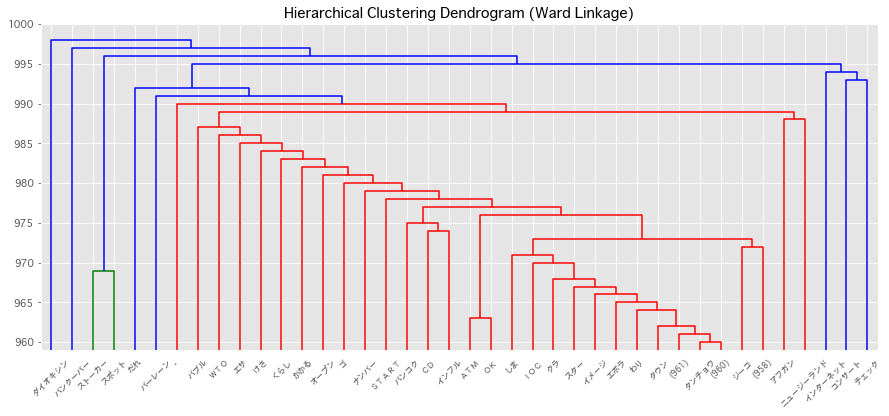

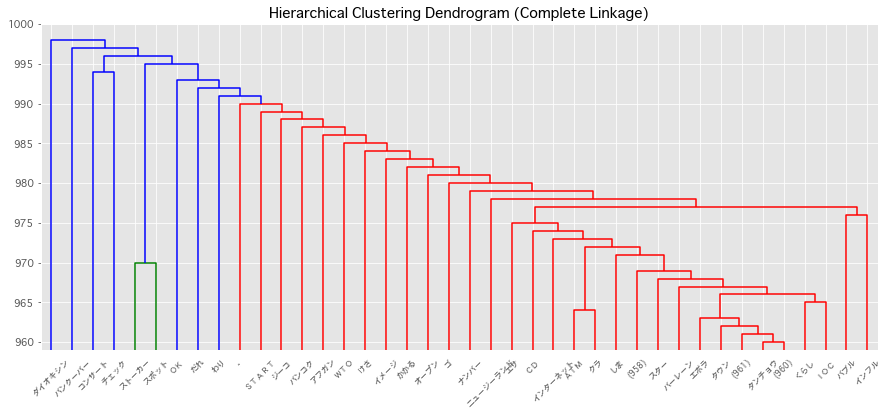

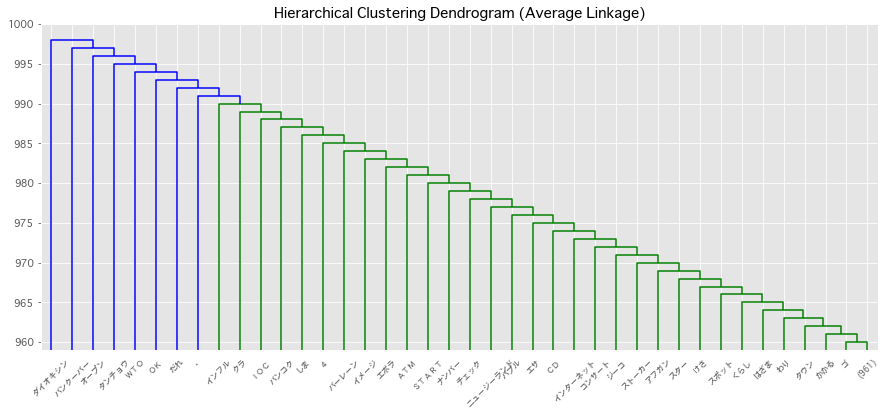

In [33]:
plt.rcParams["font.family"] ="Osaka"
plt.rcParams["figure.figsize"] = (15,6)

model1 = hiclwres
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plot_dendrogram(model1, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model1.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

model2 = hiclcres
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model2, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model2.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

model3 = hiclares
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.subplot()
plot_dendrogram(model3, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model3.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

### 3.3 Application to Full Dataset

Now we apply the analysis to full set of words. To deal with the analysis size, we first convert the transposed-word-matrix to CSR sparse matrix, as follows:

In [27]:
start = trec()

X_test = X.transpose().toarray()
X_testsp = sp.csr_matrix(X_test)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 21.371 seconds


Then, the hierarchical clustering is applied to the dataset. Due to the limitation as sparse matrix format, we use complete linkage to conduct the method. The codes and computation time are shown as follows:

In [28]:
start = trec() 

hicl_compt = hicluster(n_clusters=40, linkage='complete', affinity='l1', compute_full_tree = False)

hiclwres_test = hicl_compt.fit(X_test)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 22926.007 seconds


The dendrogram can be drawn as follows:

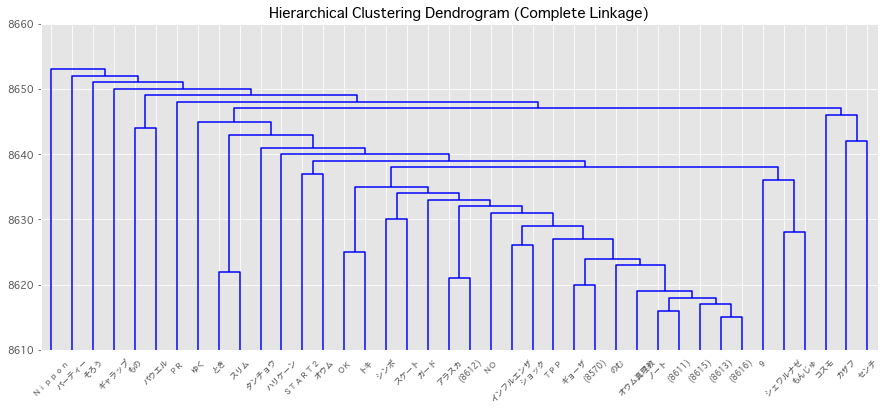

In [41]:
plt.rcParams["font.family"] ="Osaka"
plt.rcParams["figure.figsize"] = (15,6)

model4 = hiclwres_test
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model4, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model4.labels_], color_threshold = 991)
plt.ylim(8610,8660)
plt.show()

The above result shows no clear intuitve patterns. Also, the long calculation time implies that this is not an efficient method to be applied to the full dataset. Therefore, in the last part of this subsection, we will apply hierarchical clustering to the reduced word dataset, transposed version of the dataset which we already created in subsection 2.2. 

### 3.4 Application to Reduced Words Dataset

Transposed version of reduced words dataset:

In [37]:
X_transform_r = X_reduced.transpose().toarray()

freqterms_r = akey
freqterms_r = np.array(freqterms_r)[condition]

Conduct hierarchical clustering with ward, complete and average linkage:

In [38]:
start = trec() 
hicl_ward = hicluster(n_clusters=40,linkage='ward', compute_full_tree = False)
hicl_comp = hicluster(n_clusters=40,linkage='complete', compute_full_tree = False)
hicl_avg = hicluster(n_clusters=40,linkage='average', compute_full_tree = False)

hiclwres = hicl_ward.fit(X_transform_r)
hiclcres = hicl_comp.fit(X_transform_r)
hiclares = hicl_avg.fit(X_transform_r)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 1596.671 seconds


Plot dendrogram of each result:

In [ ]:
path = 'C:\Windows\Fonts\ipagp.ttf'
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

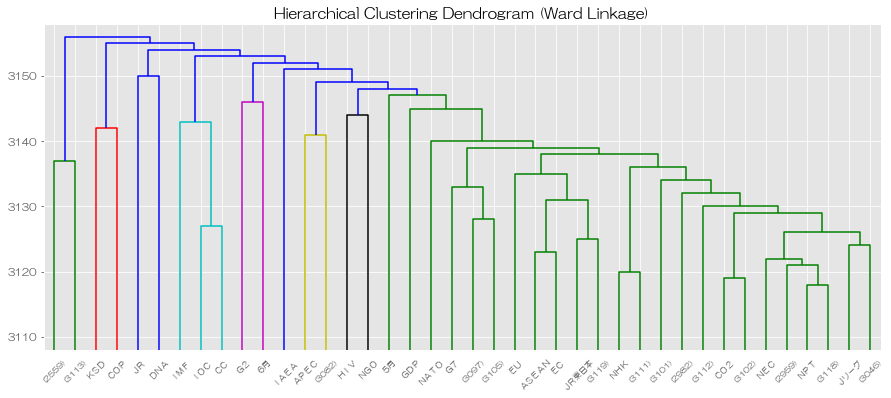

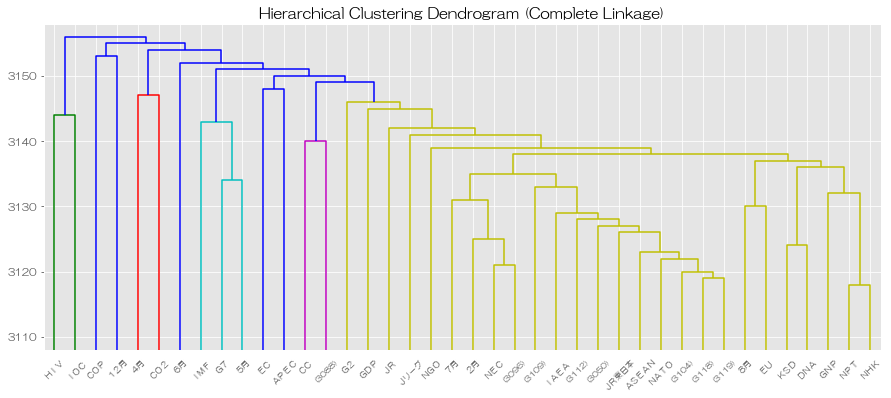

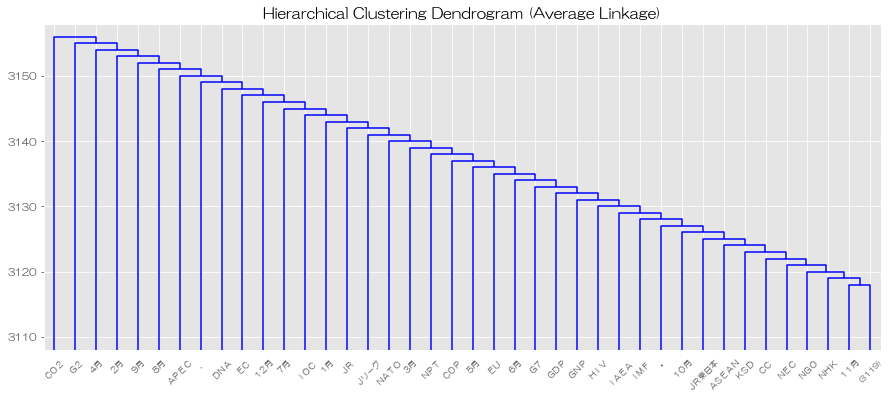

In [74]:
#print([f.name for f in mpl.font_manager.fontManager.ttflist])
#plt.rcParams["font.family"] ="Osaka" # Mac 
plt.rcParams['font.family'] = 'HGMaruGothicMPRO' # Windows
plt.rcParams["figure.figsize"] = (15,6)

model1 = hiclwres
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plot_dendrogram(model1, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freqterms_r[model1.labels_], color_threshold = 3148)
plt.ylim(3108,3158)
plt.show()

model2 = hiclcres
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model2, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freqterms_r[model2.labels_], color_threshold = 3148)
plt.ylim(3108,3158)
plt.show()

model3 = hiclares
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.subplot()
plot_dendrogram(model3, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freqterms_r[model3.labels_], color_threshold = 991)
plt.ylim(3108,3158)
plt.show()

Given the above result, ward linkage produces the most balanced cluster, at the point of 20 clusters (temporarily). The result is calculated and save as follows:

In [59]:
start = trec() 

## Save Cluster at 20
hicl_ward20 = hicluster(n_clusters=20,linkage='ward', compute_full_tree = False)
cluster20res = hicl_ward20.fit_predict(X_transform_r)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 548.885 seconds


50 random words from each cluster (with replacement) is shown as follows:

In [73]:
clusterdt = pd.DataFrame({'C00':np.random.choice(freqterms_r[cluster20res==0],50,replace=True),
              'C01':np.random.choice(freqterms_r[cluster20res==1],50,replace=True),
              'C02':np.random.choice(freqterms_r[cluster20res==2],50,replace=True),
              'C03':np.random.choice(freqterms_r[cluster20res==3],50,replace=True),
              'C04':np.random.choice(freqterms_r[cluster20res==4],50,replace=True),
              'C05':np.random.choice(freqterms_r[cluster20res==5],50,replace=True),
              'C06':np.random.choice(freqterms_r[cluster20res==6],50,replace=True),
              'C07':np.random.choice(freqterms_r[cluster20res==7],50,replace=True),
              'C08':np.random.choice(freqterms_r[cluster20res==8],50,replace=True),
              'C09':np.random.choice(freqterms_r[cluster20res==9],50,replace=True),
              'C10':np.random.choice(freqterms_r[cluster20res==10],50,replace=True),
              'C11':np.random.choice(freqterms_r[cluster20res==11],50,replace=True),
              'C12':np.random.choice(freqterms_r[cluster20res==12],50,replace=True),
              'C13':np.random.choice(freqterms_r[cluster20res==13],50,replace=True),
              'C14':np.random.choice(freqterms_r[cluster20res==14],50,replace=True),
              'C15':np.random.choice(freqterms_r[cluster20res==15],50,replace=True),
              'C16':np.random.choice(freqterms_r[cluster20res==16],50,replace=True),
              'C17':np.random.choice(freqterms_r[cluster20res==17],50,replace=True),
              'C18':np.random.choice(freqterms_r[cluster20res==18],50,replace=True),
              'C19':np.random.choice(freqterms_r[cluster20res==19],50,replace=True)})
clusterdt

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
0,陛下,ら,党,．,問題,連載,調査,大統領,首脳,万,東京,日本,者,案,選,億,政府,きょう,化,方針
1,試案,国会,自民,年度,中,連載,調査,大統領,会談,万,東京,日本,者,案,選,億,政府,きょう,化,方針
2,か国,表明,党,．,協議,連載,調査,大統領,会談,万,東京,日本,者,案,選,億,政府,きょう,化,方針
3,決算,税,党,年度,核,連載,調査,大統領,首脳,万,東京,日本,者,案,選,億,政府,きょう,化,方針
4,武力,軍,自民,．,協議,連載,調査,大統領,会談,万,東京,日本,者,案,選,億,政府,きょう,化,方針
5,値上げ,事件,自民,予算,中,連載,調査,大統領,会談,万,東京,日本,者,案,選,億,政府,きょう,化,方針
6,担保,逮捕,党,委,核,連載,調査,大統領,会談,万,東京,日本,者,案,選,億,政府,きょう,化,方針
7,エジプト,法案,自民,．,中国,連載,調査,大統領,首脳,万,東京,日本,者,案,選,億,政府,きょう,化,方針
8,人材,税,党,年度,中,連載,調査,大統領,会談,万,東京,日本,者,案,選,億,政府,きょう,化,方針
9,再開,読売新聞社,党,委,する,連載,調査,大統領,首脳,万,東京,日本,者,案,選,億,政府,きょう,化,方針


From the above, C05, C06, C07, C09, C10, C11, C12, C13, C14, C15, C16, C17, C18, C19 are consisted from only one word, and C03 and C09 are consisted from two words. The clusters are highly inbalanced, and hard to acquire substantive information.

## 4. Summary

### 4.1 Save K-Means Results

The generated clusters can be saved as follows:

In [60]:
## Load Headline Data (Section V code already included)
alldata = pd.read_csv("../../data/alldata_codepred_170529.csv", encoding='CP932')

In [61]:
start = trec()

## Save Coding

alldata['km_3cat'] = np.array(kmlabels3)
alldata['km_4cat'] = np.array(kmlabels4)
alldata['km_5cat'] = np.array(kmlabels5)

alldata['km_7catr'] = np.array(kmlabels7r)
alldata['km_8catr'] = np.array(kmlabels8r)
alldata['km_9catr'] = np.array(kmlabels9r)

alldata['km_7catr_name'] = np.array(kmlabels7r_name)
alldata['km_8catr_name'] = np.array(kmlabels8r_name)
alldata['km_9catr_name'] = np.array(kmlabels9r_name)

alldata.to_csv(path_or_buf = '../../data/alldata_codepred_170611.csv', encoding='CP932')

time_saveav = trec() - start
print('Computation time is %0.3f seconds' % time_saveav)

Computation time is 2.872 seconds


### 4.2 Concluding Comment

It looks like **k-means** performs much better than **hierarchical clustering** to identify intuitive clusters on the corresponding data. What we mean better is that clusters searched by **k-means** makes more sense than hierarchical clustering, and the more influential dimesntions of the training set makes more sense too.